In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install pandas matplotlib seaborn


<Figure size 1200x800 with 0 Axes>

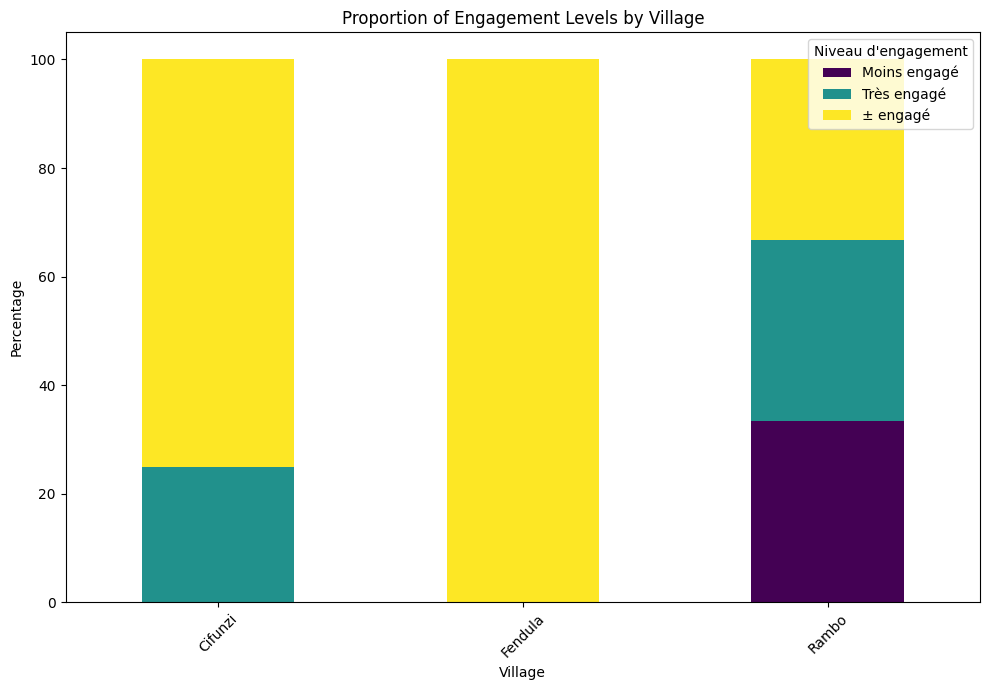

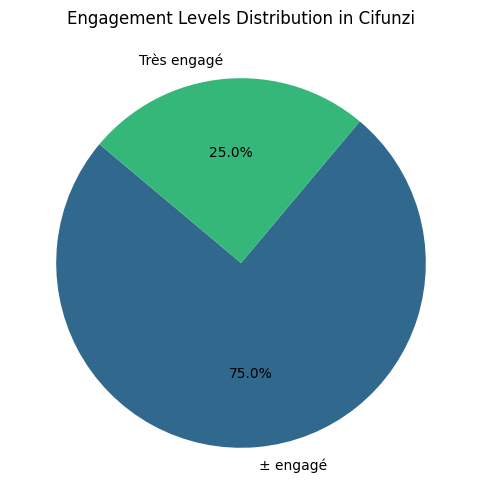

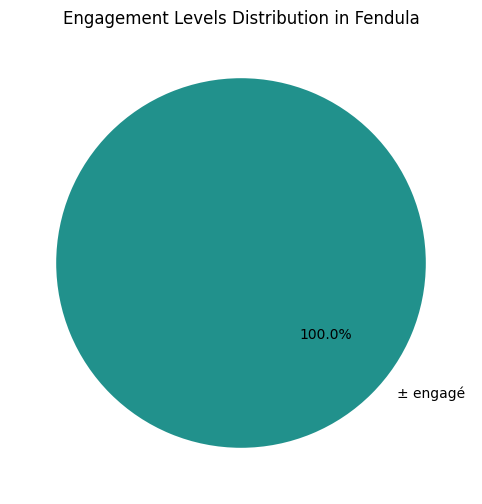

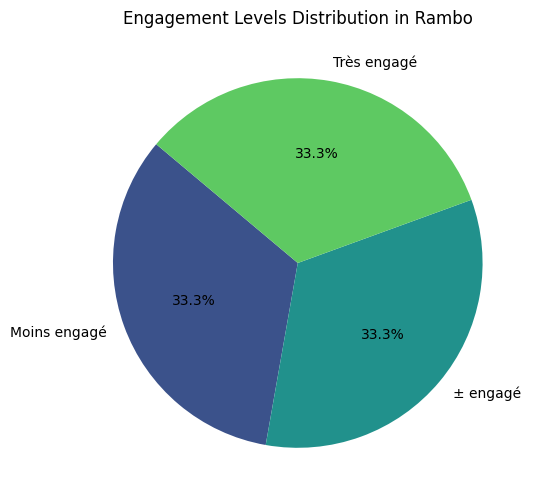

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data setup
data = {
    'Village de l\'enquêté': ['Cifunzi', 'Fendula', 'Fendula', 'Fendula', 'Cifunzi', 'Cifunzi', 'Cifunzi', 'Rambo', 'Rambo', 'Rambo'],
    'Niveau d\'engagement': ['Très engagé', '± engagé', '± engagé', '± engagé', '± engagé', '± engagé', '± engagé', 'Moins engagé', '± engagé', 'Très engagé']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the proportion of each engagement level within each village
engagement_counts = df.groupby(['Village de l\'enquêté', 'Niveau d\'engagement']).size().unstack(fill_value=0)
engagement_proportions = engagement_counts.div(engagement_counts.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(12, 8))

# Bar chart
engagement_proportions.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 7))
plt.title('Proportion of Engagement Levels by Village')
plt.xlabel('Village')
plt.ylabel('Percentage')
plt.legend(title='Niveau d\'engagement')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Alternatively, you can use pie charts for each village:
for village in df['Village de l\'enquêté'].unique():
    plt.figure(figsize=(8, 6))
    village_data = df[df['Village de l\'enquêté'] == village]['Niveau d\'engagement'].value_counts(normalize=True) * 100
    plt.pie(village_data, labels=village_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(village_data)))
    plt.title(f'Engagement Levels Distribution in {village}')
    plt.show()


In [3]:
import pandas as pd

# Sample data setup
data = {
    'Village de l\'enquêté': ['Cifunzi', 'Fendula', 'Fendula', 'Fendula', 'Cifunzi', 'Cifunzi', 'Cifunzi', 'Rambo', 'Rambo', 'Rambo'],
    'Niveau d\'engagement': ['Très engagé', '± engagé', '± engagé', '± engagé', '± engagé', '± engagé', '± engagé', 'Moins engagé', '± engagé', 'Très engagé']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the proportion of each engagement level within each village
engagement_counts = df.groupby(['Village de l\'enquêté', 'Niveau d\'engagement']).size().unstack(fill_value=0)
engagement_proportions = engagement_counts.div(engagement_counts.sum(axis=1), axis=0) * 100

# Display the table of proportions
print("Proportion of Engagement Levels by Village:")
print(engagement_proportions)

# Optionally, if you want to display the table in a more readable format in a notebook:
import seaborn as sns
from IPython.display import display

# Adding a row for total counts
engagement_totals = engagement_counts.copy()
engagement_totals.loc['Total'] = engagement_totals.sum()

# Display counts table
print("Counts of Engagement Levels by Village:")
display(engagement_totals)

# Display proportions table
print("Proportions of Engagement Levels by Village:")
display(engagement_proportions)


Proportion of Engagement Levels by Village:
Niveau d'engagement   Moins engagé  Très engagé    ± engagé
Village de l'enquêté                                       
Cifunzi                   0.000000    25.000000   75.000000
Fendula                   0.000000     0.000000  100.000000
Rambo                    33.333333    33.333333   33.333333
Counts of Engagement Levels by Village:


Niveau d'engagement,Moins engagé,Très engagé,± engagé
Village de l'enquêté,,,
Cifunzi,0,1,3
Fendula,0,0,3
Rambo,1,1,1
Total,1,2,7


Proportions of Engagement Levels by Village:


Niveau d'engagement,Moins engagé,Très engagé,± engagé
Village de l'enquêté,,,
Cifunzi,0.000000,25.000000,75.000000
Fendula,0.000000,0.000000,100.000000
Rambo,33.333333,33.333333,33.333333


In [5]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Sample data setup
data = {
    'Age de l\'enquêté': ['20-40', '61-80', '41-60', '41-60', '61-80', '61-80', '61-80', '61-80', '61-80', '61-80'],
    'Niveau d\'engagement': ['Très engagé', '± engagé', '± engagé', '± engagé', '± engagé', '± engagé', '± engagé', 'Moins engagé', '± engagé', 'Très engagé'],
    'Consentement à Payer': [70, 25, 0, 50, 50, 0, 25, 25, 0, 70]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode 'Niveau d'engagement' as numerical values
engagement_mapping = {
    'Moins engagé': 1,
    '± engagé': 2,
    'Très engagé': 3
}
df['Niveau d\'engagement'] = df['Niveau d\'engagement'].map(engagement_mapping)

# Encode 'Age de l\'enquêté' as numerical values
age_mapping = {
    '20-40': 1,
    '41-60': 2,
    '61-80': 3
}
df['Age de l\'enquêté'] = df['Age de l\'enquêté'].map(age_mapping)

# Perform ANOVA for 'Niveau d'engagement'
engagement_anova = stats.f_oneway(
    df[df['Age de l\'enquêté'] == 1]['Niveau d\'engagement'],
    df[df['Age de l\'enquêté'] == 2]['Niveau d\'engagement'],
    df[df['Age de l\'enquêté'] == 3]['Niveau d\'engagement']
)

# Perform ANOVA for 'Consentement à Payer'
payment_anova = stats.f_oneway(
    df[df['Age de l\'enquêté'] == 1]['Consentement à Payer'],
    df[df['Age de l\'enquêté'] == 2]['Consentement à Payer'],
    df[df['Age de l\'enquêté'] == 3]['Consentement à Payer']
)

# Display results
print("ANOVA results for Niveau d'engagement by Age Group:")
print(f"F-statistic: {engagement_anova.statistic}")
print(f"P-value: {engagement_anova.pvalue}")

print("\nANOVA results for Consentement à Payer by Age Group:")
print(f"F-statistic: {payment_anova.statistic}")
print(f"P-value: {payment_anova.pvalue}")


ANOVA results for Niveau d'engagement by Age Group:
F-statistic: 1.5749999999999997
P-value: 0.2724030664766574

ANOVA results for Consentement à Payer by Age Group:
F-statistic: 1.1405680224403927
P-value: 0.37259682908908975


In [1]:
import pandas as pd
import scipy.stats as stats

# Sample data setup
data = {
    'Niveau d\'éducation': ['Secondaire', 'Primaire', 'Primaire', 'Primaire', 'Primaire', 'Primaire', 'Primaire', 'Primaire', 'Secondaire', 'Secondaire', 'University', 'University', 'University'],
    'Consentement à Payer': [70, 25, 0, 50, 50, 0, 25, 25, 0, 70, 40, 60, 80]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode 'Niveau d'éducation' as numerical values
education_mapping = {
    'Primaire': 1,
    'Secondaire': 2,
    'University': 3
}
df['Niveau d\'éducation'] = df['Niveau d\'éducation'].map(education_mapping)

# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Niveau d\'éducation'] == 1]['Consentement à Payer'],  # Primaire
    df[df['Niveau d\'éducation'] == 2]['Consentement à Payer'],  # Secondaire
    df[df['Niveau d\'éducation'] == 3]['Consentement à Payer']   # University
)

# Display results
print("ANOVA results for Consent to Pay by Education Level:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA results for Consent to Pay by Education Level:
F-statistic: 2.1778602108551346
P-value: 0.16401177955478757


In [2]:
import pandas as pd
import scipy.stats as stats

# Sample data setup
data = {
    'SE tres important': ['Oui', 'Non', 'Oui', 'Oui', 'Non', 'Oui', 'Non', 'Oui', 'Non', 'Oui'],
    'Consentement à Payer': [70, 25, 0, 50, 25, 0, 25, 25, 0, 70]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Separate data by importance of ecosystem services
high_importance_payment = df[df['SE tres important'] == 'Oui']['Consentement à Payer']
low_importance_payment = df[df['SE tres important'] == 'Non']['Consentement à Payer']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(high_importance_payment, low_importance_payment, equal_var=False)

# Display results
print("T-test results for Consent to Pay by Ecosystem Service Importance:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-test results for Consent to Pay by Ecosystem Service Importance:
T-statistic: 1.1702827329690664
P-value: 0.28063011827366674


In [3]:
import pandas as pd
import scipy.stats as stats

# Sample data setup
data = {
    'Impact de deforestation': ['Diminution des ressources', 'Diminution des ressources', 'Diminution des ressources', 'Risques et catastrophes naturels', 'Risques et catastrophes naturels', 'Risques et catastrophes naturels', 'Diminution des ressources', 'Protection de l\'environnement', 'Protection de l\'environnement', 'Protection de l\'environnement'],
    'Consentement à Payer': [70, 25, 0, 50, 50, 0, 25, 25, 0, 70]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode 'Impact de deforestation' as numerical values
impact_mapping = {
    'Diminution des ressources': 1,
    'Risques et catastrophes naturels': 2,
    'Protection de l\'environnement': 3
}
df['Impact de deforestation'] = df['Impact de deforestation'].map(impact_mapping)

# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Impact de deforestation'] == 1]['Consentement à Payer'],  # Diminution des ressources
    df[df['Impact de deforestation'] == 2]['Consentement à Payer'],  # Risques et catastrophes naturels
    df[df['Impact de deforestation'] == 3]['Consentement à Payer']   # Protection de l'environnement
)

# Display results
print("ANOVA results for Consent to Pay by Impact of Deforestation:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA results for Consent to Pay by Impact of Deforestation:
F-statistic: 0.009962871287128715
P-value: 0.9901006064801219


In [4]:
import pandas as pd
import scipy.stats as stats

# Sample data setup
data = {
    'Niveau d\'engagement': ['Très engagé', '± engagé', '± engagé', '± engagé', '± engagé', '± engagé', '± engagé', 'Moins engagé', '± engagé', 'Très engagé'],
    'Consentement à Payer': [70, 25, 0, 50, 50, 0, 25, 25, 0, 70]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode 'Niveau d'engagement' as numerical values
engagement_mapping = {
    'Très engagé': 1,
    '± engagé': 2,
    'Moins engagé': 3
}
df['Niveau d\'engagement'] = df['Niveau d\'engagement'].map(engagement_mapping)

# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Niveau d\'engagement'] == 1]['Consentement à Payer'],  # Très engagé
    df[df['Niveau d\'engagement'] == 2]['Consentement à Payer'],  # ± engagé
    df[df['Niveau d\'engagement'] == 3]['Consentement à Payer']   # Moins engagé
)

# Display results
print("ANOVA results for Consent to Pay by Engagement Level:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA results for Consent to Pay by Engagement Level:
F-statistic: 4.285235294117647
P-value: 0.06092381003533795


In [5]:
import pandas as pd
import scipy.stats as stats

# Sample data setup
data = {
    'Activité principale de l\'enquêté': ['vente de charbon de bois', 'Agriculture', 'Agriculture', 'Agriculture', 'Agriculture', 'Agriculture', 'Agriculture', 'vente de charbon de bois', 'Agriculture', 'vente de charbon de bois'],
    'Consentement à Payer': [70, 25, 0, 50, 50, 0, 25, 25, 0, 70]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Separate data by primary activity
charcoal_payment = df[df['Activité principale de l\'enquêté'] == 'vente de charbon de bois']['Consentement à Payer']
agriculture_payment = df[df['Activité principale de l\'enquêté'] == 'Agriculture']['Consentement à Payer']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(charcoal_payment, agriculture_payment, equal_var=False)

# Display results
print("T-test results for Consent to Pay by Main Activity:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-test results for Consent to Pay by Main Activity:
T-statistic: 1.9470978227480285
P-value: 0.136405585373939


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


                             OLS Regression Results                             
Dep. Variable:     Consentement à Payer   R-squared:                       0.606
Model:                              OLS   Adj. R-squared:                  0.290
Method:                   Least Squares   F-statistic:                     1.919
Date:                  Fri, 23 Aug 2024   Prob (F-statistic):              0.246
Time:                          21:27:10   Log-Likelihood:                -42.114
No. Observations:                    10   AIC:                             94.23
Df Residuals:                         5   BIC:                             95.74
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

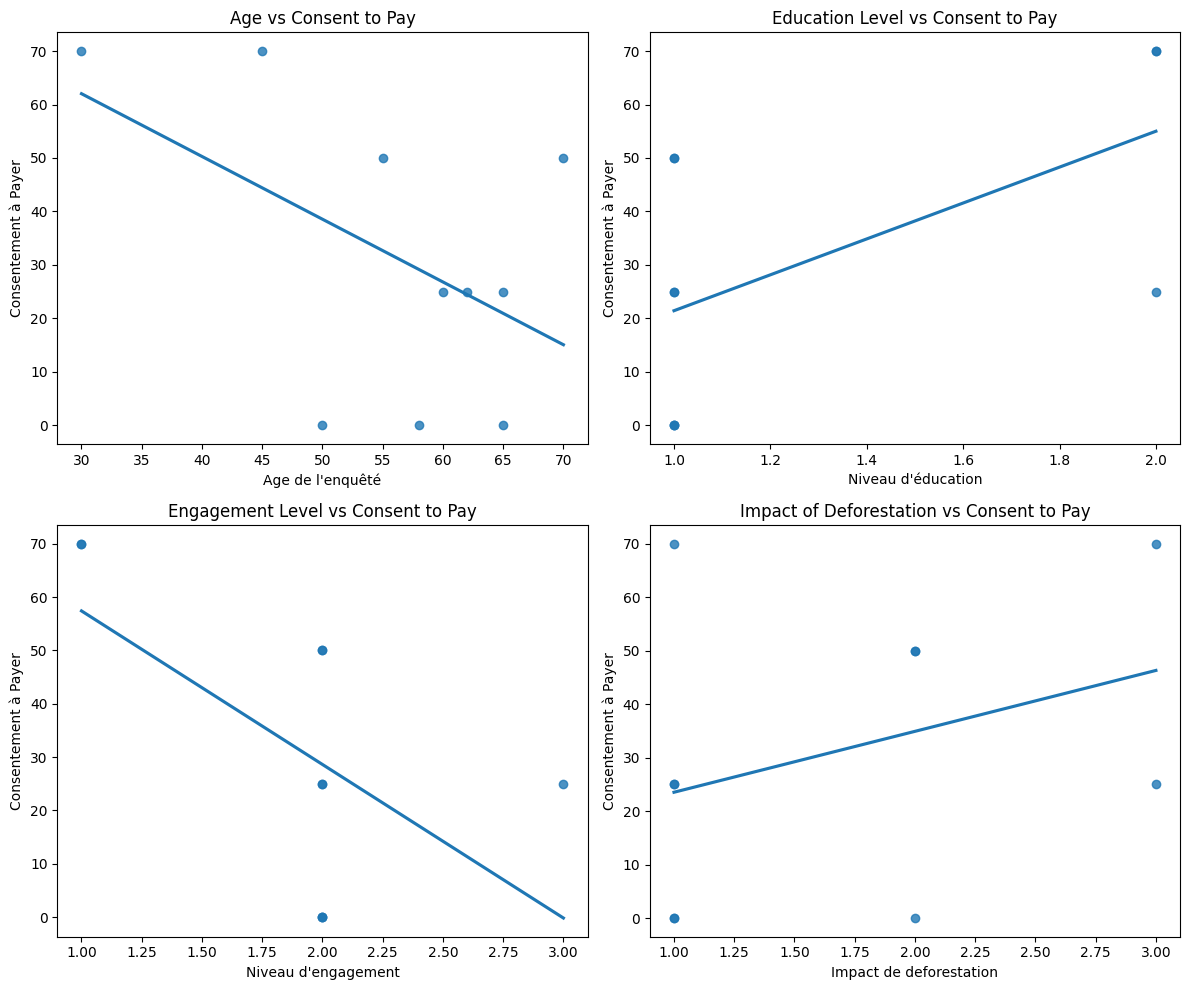

In [6]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data setup
data = {
    'Age de l\'enquêté': [30, 65, 50, 55, 70, 65, 60, 62, 58, 45],
    'Niveau d\'éducation': [2, 1, 1, 1, 1, 1, 1, 2, 1, 2],  # Encoded as 1: Primaire, 2: Secondaire, 3: Universitaire
    'Niveau d\'engagement': [1, 2, 2, 2, 2, 2, 2, 3, 2, 1],  # Encoded as 1: Très engagé, 2: ± engagé, 3: Moins engagé
    'Impact de deforestation': [1, 1, 1, 2, 2, 2, 1, 3, 1, 3],  # Encoded as 1: Diminution des ressources, 2: Risques et catastrophes naturels, 3: Protection de l'environnement
    'Activité principale': [1, 2, 2, 2, 2, 2, 2, 1, 2, 1],  # Encoded as 1: vente de charbon de bois, 2: Agriculture
    'Consentement à Payer': [70, 25, 0, 50, 50, 0, 25, 25, 0, 70]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define predictors and response variable
X = df[['Age de l\'enquêté', 'Niveau d\'éducation', 'Niveau d\'engagement', 'Impact de deforestation', 'Activité principale']]
y = df['Consentement à Payer']

# Add constant term for intercept
X = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Partial regression plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.regplot(x=df['Age de l\'enquêté'], y=y, ax=axs[0, 0], ci=None)
axs[0, 0].set_title('Age vs Consent to Pay')

sns.regplot(x=df['Niveau d\'éducation'], y=y, ax=axs[0, 1], ci=None)
axs[0, 1].set_title('Education Level vs Consent to Pay')

sns.regplot(x=df['Niveau d\'engagement'], y=y, ax=axs[1, 0], ci=None)
axs[1, 0].set_title('Engagement Level vs Consent to Pay')

sns.regplot(x=df['Impact de deforestation'], y=y, ax=axs[1, 1], ci=None)
axs[1, 1].set_title('Impact of Deforestation vs Consent to Pay')

plt.tight_layout()
plt.show()


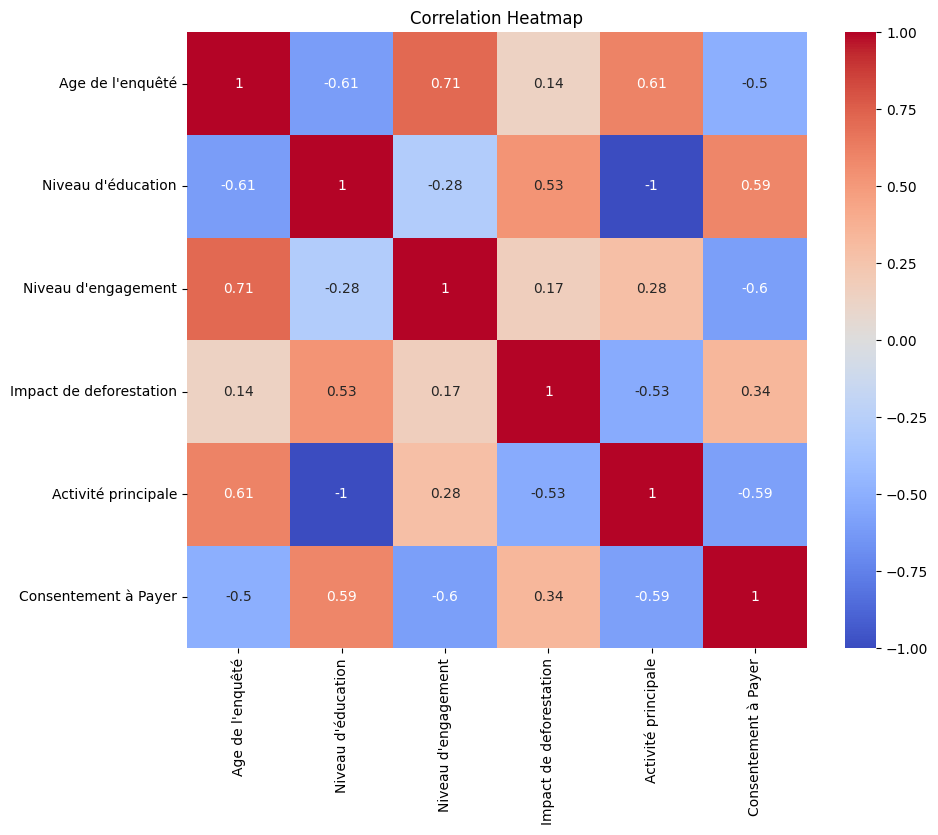

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()


In [1]:
pip install pypandoc pandoc


ERROR: Could not find a version that satisfies the requirement pypandoc (from versions: none)
ERROR: No matching distribution found for pypandoc
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pypandoc

# Replace 'your_script.py' with the name of your downloaded Python file
input_file = 'your_script.py'
output_file = 'your_script.docx'

pypandoc.convert_file(input_file, 'docx', outputfile=output_file)


ModuleNotFoundError: No module named 'pypandoc'